In [1]:
import numpy as np
import pandas as pd
from scipy.special import hyp2f1
from itertools import product


from models import model_selection, get_best_crit, model_evaluation
from extreme.estimators import sim_estimators, sim_coverage_probabilities
from extreme import visualization as xviz
from extreme.data_management import DataSampler, load_quantiles

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Data Description

## Quantile plot

### Pareto

In [ ]:
xviz.quantile_plot(distribution="pareto", params={"evi":0.5}, 
             n_data=500, alpha=0.1, rep=5)

### InvGamma

In [ ]:
xviz.quantile_plot(distribution="invgamma", params={"evi":0.2}, 
             n_data=500, alpha=1, rep=5)

### Burr

In [ ]:
xviz.quantile_plot(distribution="burr", params={"evi":0.9, "rho":-1/4}, 
             n_data=500, alpha=0.2, rep=5)

### Student

In [ ]:
xviz.quantile_plot(distribution="student", params={"evi":0.3}, 
             n_data=500, alpha=0.2, rep=5)

## BCTM

$$k\in\{1+[\zeta n],\dots, [\alpha n]-1 \}\mapsto \hat{\mathcal M}(k/n, a)=\frac{1}{k}\sum_{j=1}^{k}K_a(X_{n-j+1, n})$$
with
$$K_a(x) = \begin{cases} \frac{x^a -1}{a}\quad \text{ if } a\neq 0 \\ \log(x) \quad \text{ else } \end{cases}$$

### Pareto

In [ ]:
xviz.bctm_plot(distribution="pareto", params={"evi": 0.5}, 
             n_data=500, alpha=0.5, rep=30, zeta=0.02, a=1.)

### Burr

In [ ]:
xviz.bctm_plot(distribution="burr", params={"evi":0.5, "rho": -1}, 
             n_data=500, alpha=0.5, zeta=0.02, rep=30, a=1.)

### GPD

In [ ]:
xviz.bctm_plot(distribution="gpd", params={"evi":0.1}, 
             n_data=500, alpha=0.5, rep=30, zeta=0.02, a=0.5)

### Student

In [ ]:
xviz.bctm_plot(distribution="student", params={"evi":0.5}, 
             n_data=500, alpha=1, rep=30, zeta=0.02, a=1)

### Inverse Gamma

In [ ]:
xviz.bctm_plot(distribution="invgamma", params={"evi":0.4}, 
             n_data=500, alpha=0.5, rep=30, zeta=0.02, a=1)

### Fisher

In [ ]:
xviz.bctm_plot(distribution="fisher", params={"evi":0.4}, 
             n_data=500, alpha=0.2, rep=30, zeta=0.02, a=1)

### Frechet

In [ ]:
xviz.bctm_plot(distribution="frechet", params={"evi":0.5}, 
             n_data=500, alpha=0.2, rep=20, zeta=0.02, a=1)

# Extreme Estimation

In [12]:
sim_estimators(n_replications=500, n_data=500, risk_level=1/1000, 
               distribution="burr", params={"evi":0.1, "rho": -1.}, a=1, zeta=0.02)

,D,D_GRB,D_RB,I,I_RB
RMSE,0.139275,0.011895,0.005251,0.144527,0.033335


## Pareto

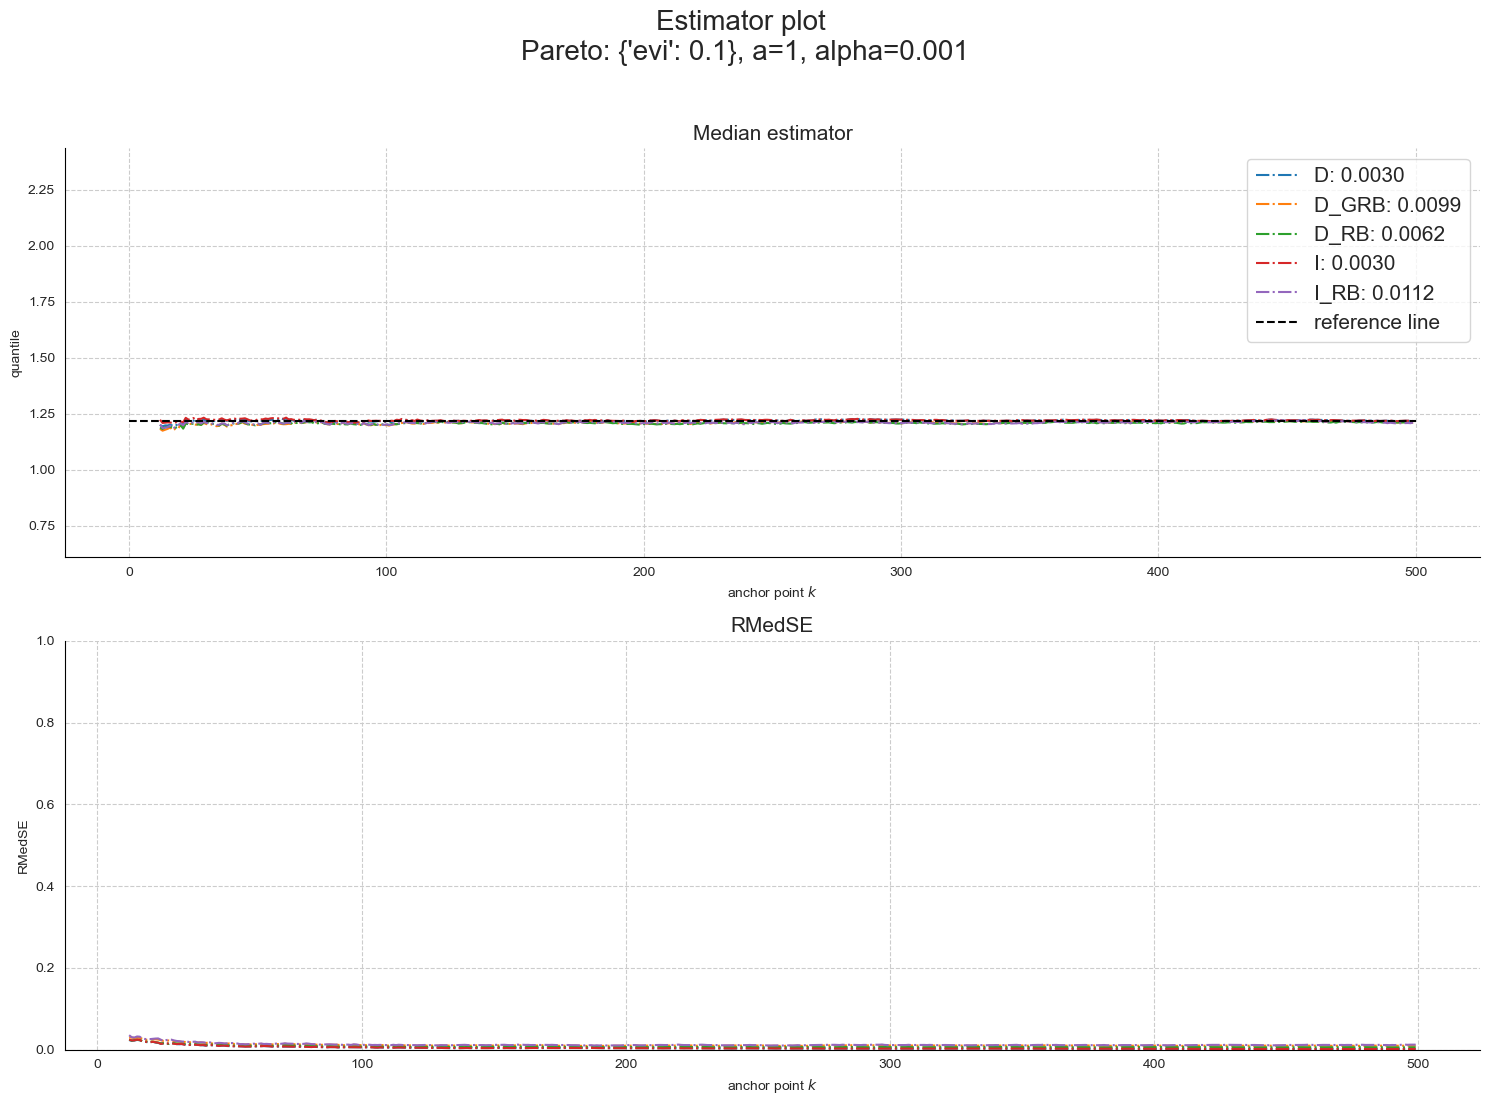

In [8]:
xviz.xbctm_evt_mse_plot(distribution="pareto", params={"evi":0.1}, 
                 n_data=500, zeta=0.02, a=1, risk_level=1/(2*500),
                        n_replications=500, criteria="mad", metric="median")

## Burr

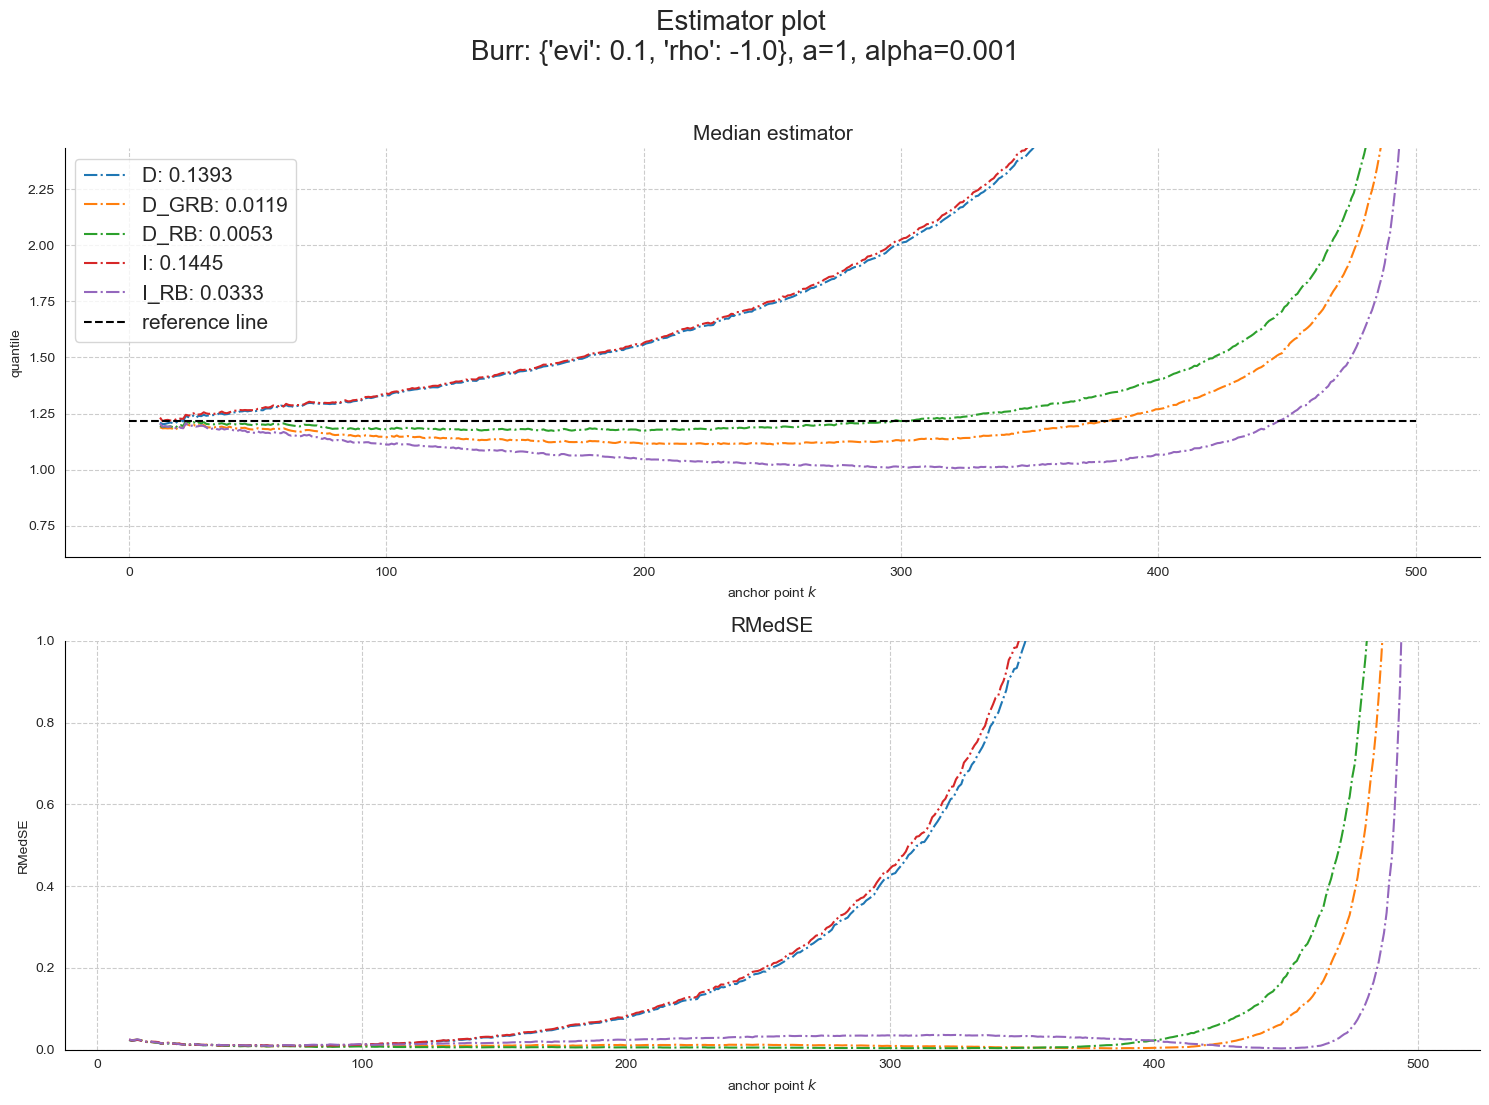

In [15]:
xviz.xbctm_evt_mse_plot(distribution="burr", params={"evi":0.1, "rho":-1.}, 
                 n_data=500, zeta=0.02, a=1, risk_level=1/(2*500),
                        n_replications=500, criteria="mad", metric="median")

In [ ]:
#xviz.xbctm_evt_mse_paper_plot(distribution="burr", params={"evi":0.5, "rho":-0.5}, 
#                 n_data=500, zeta=0.02, a=1, risk_level=1/(2*500),
#                        n_replications=500, metric="median", graph="bias", saved=True)

## GPD

In [ ]:
xviz.xbctm_evt_mse_plot(distribution="gpd", params={"evi":0.9}, 
                 n_data=500, zeta=0.02, a=1, risk_level=1/(2*500),
                        n_replications=500, criteria="mad", metric="median")

## Student

In [ ]:
xviz.xbctm_evt_mse_plot(distribution="student", params={"evi":0.3}, 
                 n_data=500, zeta=0.02, a=0.5, risk_level=1/(2*500),
                        n_replications=500, criteria="mad", metric="median")

## InvGamma


In [ ]:
xviz.xbctm_evt_mse_plot(distribution="invgamma", params={"evi":0.9}, 
                 n_data=500, zeta=0.02, a=1, risk_level=1/(2*500),
                        n_replications=500, criteria="mad", metric="median")

## Fisher

In [ ]:
xviz.xbctm_evt_mse_plot(distribution="fisher", params={"evi":0.7}, 
                 n_data=500, zeta=0.02, a=0.5, risk_level=1/(2*500),
                        n_replications=500, criteria="mad", metric="median")

## Frechet

In [ ]:
xviz.xbctm_evt_mse_plot(distribution="frechet", params={"evi":0.7}, 
                 n_data=500, zeta=0.02, a=1, risk_level=1/(2*500),
                        n_replications=500, criteria="mad", metric="median")

# Coverage probability 

## a=1

In [8]:
LIST_EVI = [0.1, 0.3, 0.5, 0.7, 0.9]  # extreme value indices
LIST_SOP = [-1., -0.75, -0.5]  # second order parameters
df_coverage = pd.DataFrame(columns=['D_RB', 'I_RB'])
dict_coverage = {}
for sop in LIST_SOP:
    for evi in LIST_EVI:
        df_coverage.loc[f"{evi}_{sop}", :] = sim_coverage_probabilities(n_replications=500, n_data=500, 
                                                                    risk_level=1/1000, 
                                                                    distribution="burr", 
                                                                    params={"evi":evi, "rho": sop}, 
                                                                    a=1, zeta=0.02).values[0]*100

In [9]:
df_coverage

,D_RB,I_RB
0.1_-1.0,77.4,30.2
0.3_-1.0,78.2,33.6
0.5_-1.0,76.6,36.2
0.7_-1.0,72.8,38.8
0.9_-1.0,55.2,34.4
0.1_-0.75,73.8,71.0
0.3_-0.75,70.4,74.8
0.5_-0.75,66.6,78.4
0.7_-0.75,68.0,79.4
0.9_-0.75,81.0,42.2


## a=0.5

In [6]:
LIST_EVI = [0.1, 0.3, 0.5, 0.7, 0.9]  # extreme value indices
LIST_SOP = [-1., -0.75, -0.5]  # second order parameters
df_coverage = pd.DataFrame(columns=['D_RB', 'I_RB'])
dict_coverage = {}
for sop in LIST_SOP:
    for evi in LIST_EVI:
        df_coverage.loc[f"{evi}_{sop}", :] = sim_coverage_probabilities(n_replications=500, n_data=500, 
                                                                    risk_level=1/1000, 
                                                                    distribution="burr", 
                                                                    params={"evi":evi, "rho": sop}, 
                                                                    a=0.5, zeta=0.02).values[0]*100

In [7]:
df_coverage

,D_RB,I_RB
0.1_-1.0,78.2,29.0
0.3_-1.0,77.8,31.4
0.5_-1.0,77.6,33.0
0.7_-1.0,77.8,33.2
0.9_-1.0,77.0,35.2
0.1_-0.75,75.8,69.6
0.3_-0.75,72.6,72.0
0.5_-0.75,70.6,72.8
0.7_-0.75,69.4,75.6
0.9_-0.75,66.4,76.8
